In [38]:
#The library we need for reading and analyzing the dataset.
library(tidyverse)
library(digest)
library(repr)
library(tidymodels)
library(readxl)
library(cowplot)
options(repr.matrix.max.rows = 6)

#### Reading the data

In [13]:
# We are reading the dataset from the online data folder.
# The data_1 means the training data selected from the sheet 2.
# The data_2 means the testing data selected from the sheet 3.
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"

download.file(url, "data.xls")
data_1 <- read_excel("data.xls", sheet = 2) 
data_2 <- read_excel("data.xls", sheet = 3)
data_1
data_2

New names:
* `` -> ...7
* `` -> ...8

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High,NA,NA,NA
0.50,0.75,0.81,0.61,0.26,Middle,NA,NA,NA
0.66,0.90,0.76,0.87,0.74,High,NA,NA,NA


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.05,0.05,0.55,0.60,0.14,Low,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.08,0.18,0.63,0.60,0.85,High,NA,NA,STR (The degree of study time of user for related objects with goal object)
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low,NA,NA,NA
0.66,0.68,0.81,0.57,0.57,Middle,NA,NA,NA
0.68,0.64,0.79,0.97,0.24,Middle,NA,NA,NA


STG : the degree of study time for goal object materials;

SCG : the degree of repetition number of user for goal object materials;

STR : the degree of study time of user for related objects with goal object;

LPR : the exam performance of user for related objects with goal object;

PEG : the exam performance of user for goal objects;

UNS : The knowledge level of user.

#### Cleaning and Wrangling the data.

In [30]:
# We are arranging the data to a tidy data format.

user_training <-data_1 %>%
select(STG,SCG,STR,LPR,PEG,UNS) %>%
mutate(UNS = as_factor(UNS))

user_training


user_testing <-data_2 %>%
select(STG,SCG,STR,LPR,PEG,UNS)%>%
mutate(UNS = as_factor(UNS))

user_testing

user_data <- rbind(user_training,user_testing)
user_data

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


In [21]:
# We are checking how many levels there are for UNS ,which we will try to predict later.
UNS_levels <- user_training %>%
pull(UNS) %>%
levels()

UNS_levels

[1] "very_low" "High"     "Low"      "Middle"

#### Determining which variables to use as predictors 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



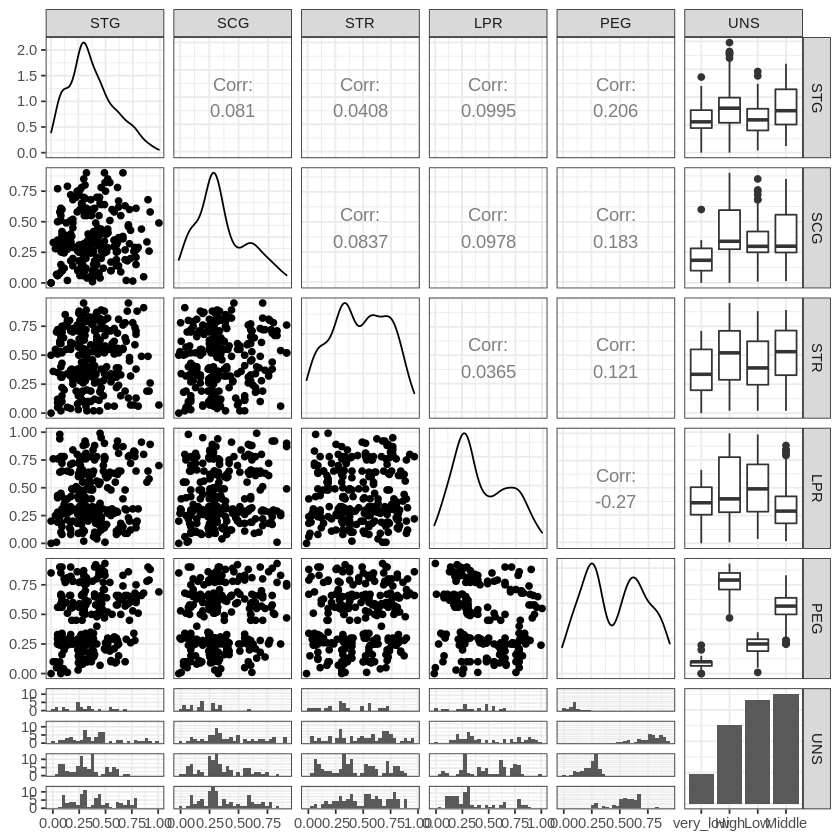

In [39]:
ggpairs(user_training)+theme_bw()


#### Summarizing the data

In [24]:
#the number of observations in each class
num_obs <- nrow(user_training)
user_training %>%
  group_by(UNS) %>%
  summarize(count = n(),
            percentage = n() / num_obs * 100)
num_obs

`summarise()` ungrouping output (override with `.groups` argument)



UNS,count,percentage
<fct>,<int>,<dbl>
very_low,24,9.302326
High,63,24.418605
Low,83,32.170543
Middle,88,34.108527


[1] 258

In [46]:
#the means of the predictor variables you plan to use in your analysis 
predictor_means <- user_training%>%
select(-UNS,-STR)%>%
map_df(mean,na.rm= TRUE)

predictor_means

STG,SCG,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4327132,0.4585388


In [52]:
#how many rows have missing data
sum(is.na(user_training))

[1] 0

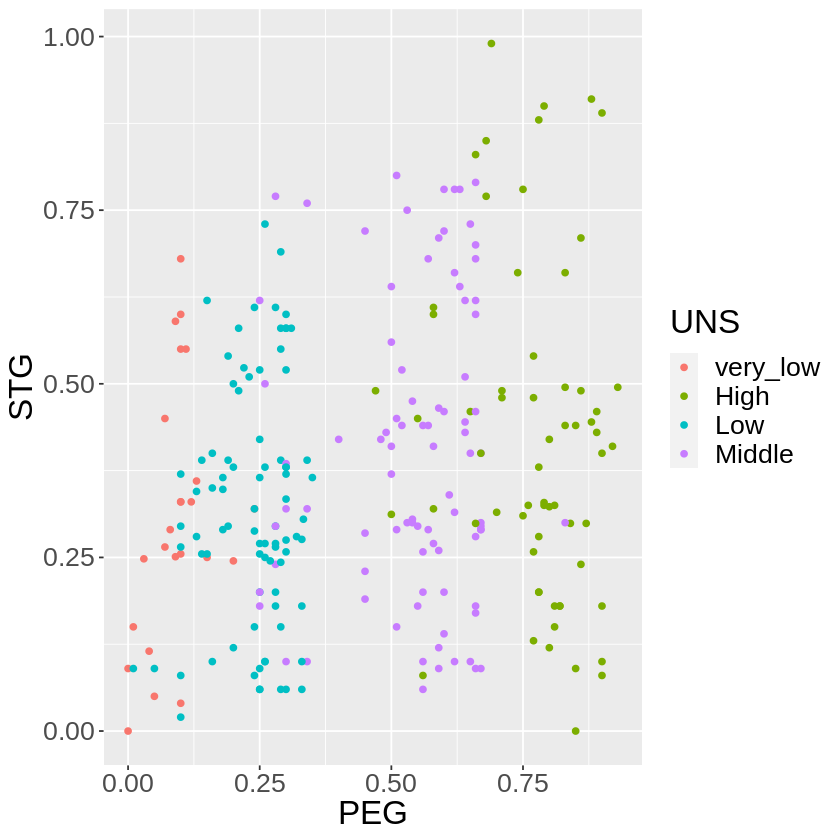

In [64]:
graph1 <- user_training %>%
ggplot(aes(y=STG, x=PEG , colour = UNS))+ 
geom_point()+
# geom_point(aes(colour = UNS,shape = UNS))+
# geom_line(aes(colour = UNS))+
theme(text=element_text(size=20))
graph1